# visualize global performance 

In [20]:
import torch
import matplotlib.pyplot as plt
import collections


# Load PyTorch checkpoint file

def visualize_global(data, n_adv= 0, n_s = 10):
    # Track seller selection counts
    seller_selection_counts = collections.Counter()

    # Track final performance changes
    round_numbers = []
    final_loss = []
    final_acc = []

    # Process each round
    for round_data in data:
        round_numbers.append(round_data["round_number"])
        final_loss.append(round_data["final_perf_local"]["loss"])
        final_acc.append(round_data["final_perf_local"]["acc"])

        # Count selections per seller
        for seller in round_data["used_sellers"]:
            seller_selection_counts[seller] += 1

    # Create an ordered dictionary for seller names to maintain the sequence
    seller_names = collections.OrderedDict()
    for i in range(n_adv):
        seller_names[i] = f"adv_{i}"
    for i in range(n_adv, n_s):
        seller_names[i] = f"seller_{i}"

    # Ensure that all sellers (even those with 0 selections) are included in the order
    sorted_seller_counts = collections.OrderedDict()
    for seller_id in seller_names.keys():
        sorted_seller_counts[seller_id] = seller_selection_counts.get(seller_id, 0)

    # Map seller IDs to their corresponding names in the correct order
    mapped_sellers = list(seller_names.values())
    selection_counts = list(sorted_seller_counts.values())

    # Plot seller selection counts
    plt.figure(figsize=(10, 5))
    plt.bar(mapped_sellers, selection_counts, color="skyblue")

    plt.xlabel("Seller Name")
    plt.ylabel("Number of Selections")
    plt.title("Number of Selections per Seller")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")  

    plt.show()

    # Plot final loss and accuracy changes over rounds
    plt.figure(figsize=(10, 5))
    plt.plot(round_numbers, final_loss, label="Loss", marker="o")
    plt.plot(round_numbers, final_acc, label="Accuracy", marker="s")
    plt.xlabel("Round Number")
    plt.ylabel("Value")
    plt.title("Change in Final Performance (Local) Over Rounds")
    plt.legend()
    plt.grid()
    plt.show()


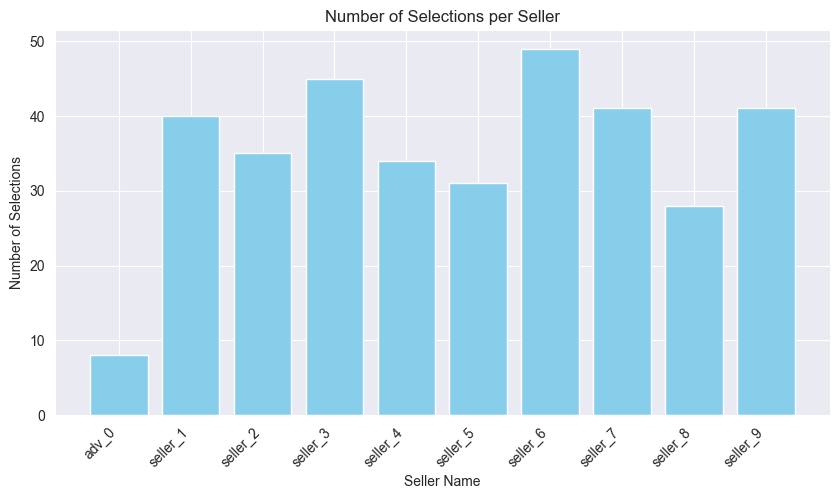

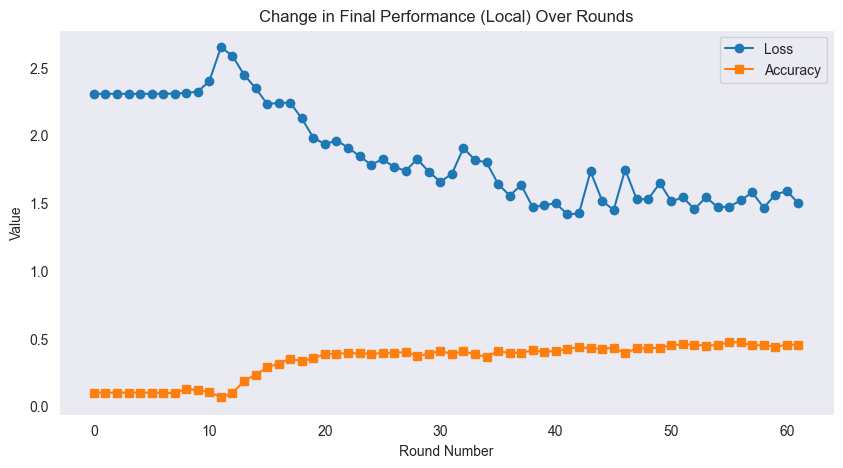

In [42]:
strength = 1.0
# bm = "single"
bm = "cmd"
# bm = "None"
n_adv = 1
file_name = f"./result/backdoor_mode_{bm}_strength_{strength}/n_seller_10_n_adv_{n_adv}_local_epoch_2_local_lr_0.01/market_log.ckpt"

data = torch.load(file_name, weights_only=False )  # Change filename as needed

visualize_global(data, n_adv=n_adv)

In [28]:
import matplotlib.pyplot as plt
import collections
import numpy as np

def visualize_comparative(data_by_adv):
    """
    Visualize and compare the experimental results for different numbers of adversaries.

    Parameters:
      data_by_adv (dict): Dictionary mapping adversary count (int) to a list of round_data.
                          Each round_data should be a dict with:
                              "round_number": int,
                              "final_perf_local": dict with keys "loss" and "acc",
                              "used_sellers": list of seller IDs.
    """
    # Define colors for each curve using a colormap.
    adv_counts = sorted(data_by_adv.keys())
    colors = plt.cm.viridis(np.linspace(0, 1, len(adv_counts)))
    
    # Create subplots for loss and accuracy over rounds.
    fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(14, 6))
    
    for i, adv in enumerate(adv_counts):
        round_numbers = []
        final_loss = []
        final_acc = []
        for rd in data_by_adv[adv]:
            round_numbers.append(rd["round_number"])
            final_loss.append(rd["final_perf_local"]["loss"])
            final_acc.append(rd["final_perf_local"]["acc"])
        
        ax_loss.plot(round_numbers, final_loss, label=f"Adv: {adv}", marker="o", color=colors[i])
        ax_acc.plot(round_numbers, final_acc, label=f"Adv: {adv}", marker="s", color=colors[i])
    
    ax_loss.set_xlabel("Round Number")
    ax_loss.set_ylabel("Loss")
    ax_loss.set_title("Loss over Rounds")
    ax_loss.legend(title="Number of Adversaries")
    ax_loss.grid(True)
    
    ax_acc.set_xlabel("Round Number")
    ax_acc.set_ylabel("Accuracy")
    ax_acc.set_title("Accuracy over Rounds")
    ax_acc.legend(title="Number of Adversaries")
    ax_acc.grid(True)
    
    plt.tight_layout()
    plt.show()

    # Additionally, visualize seller selection counts across experiments.
    plt.figure(figsize=(12, 6))
    for adv in adv_counts:
        seller_selection_counts = collections.Counter()
        for rd in data_by_adv[adv]:
            for seller in rd["used_sellers"]:
                seller_selection_counts[seller] += 1
        # Plot counts for this adversary count.
        sellers = list(seller_selection_counts.keys())
        counts = list(seller_selection_counts.values())
        plt.plot(sellers, counts, marker="o", label=f"Adv: {adv}")
    
    plt.xlabel("Seller ID")
    plt.ylabel("Number of Selections")
    plt.title("Seller Selection Counts across Different Adversary Numbers")
    plt.legend(title="Number of Adversaries")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



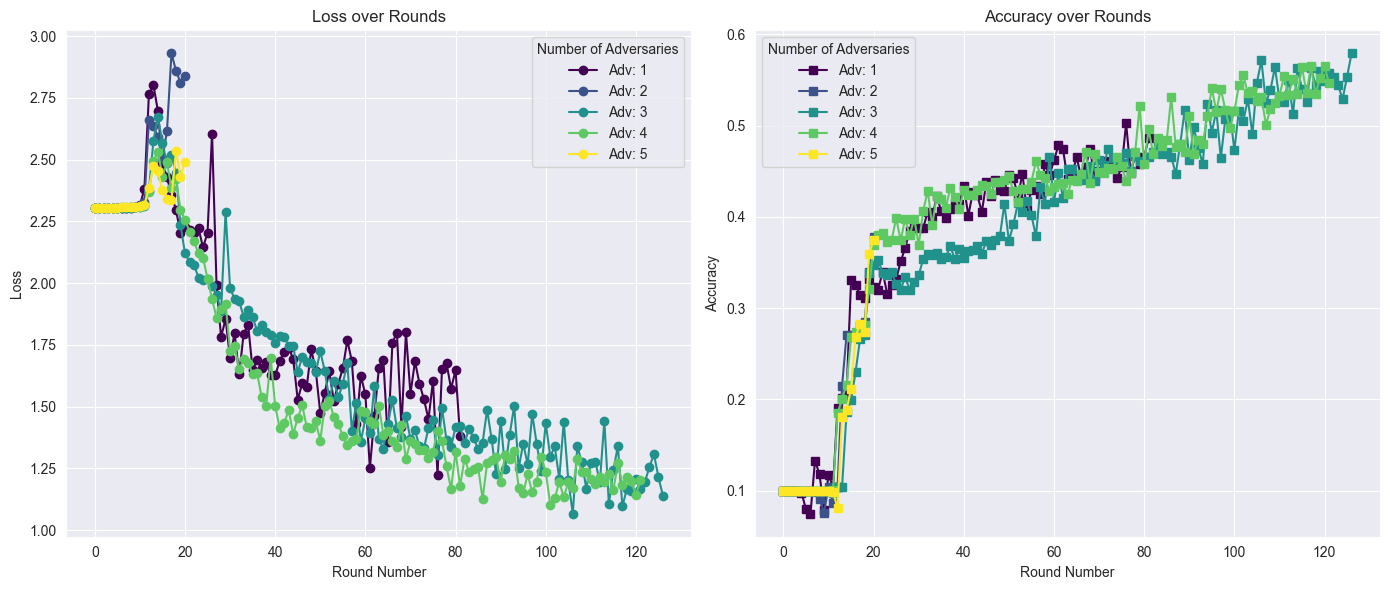

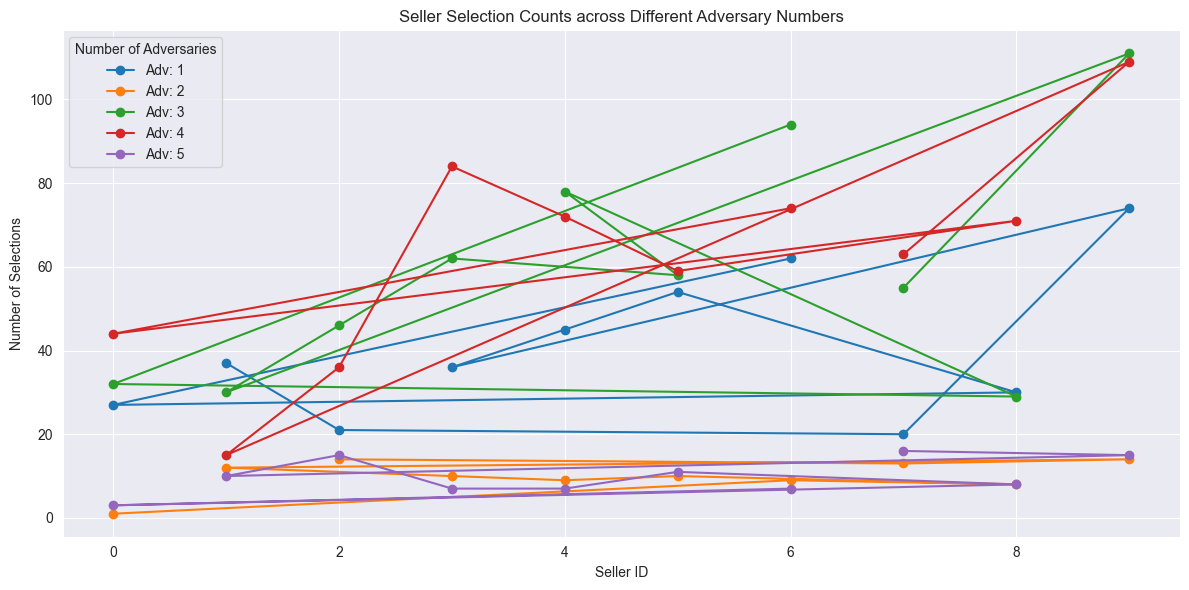

In [37]:

strength = 0.1
bm = "single"
# bm = "cmd"
# bm = "None"
n_adv = 1


data_diff_adv = collections.OrderedDict()
for n_adv in range(1,6):
    file_name = f"./result/backdoor_mode_{bm}_strength_{strength}/n_seller_10_n_adv_{n_adv}_local_epoch_2_local_lr_0.01/market_log.ckpt"
    cur_data = torch.load(file_name, weights_only=False )  # Change filename as needed
    data_diff_adv[n_adv] = (cur_data)
visualize_comparative(data_diff_adv)




In [51]:
records = torch.load("./result/backdoor_mode_single_strength_0.1/n_seller_10_n_adv_1_local_epoch_2_local_lr_0.01/local_log_adv_seller_0.ckpt", weights_only=False)


SyntaxError: invalid syntax (utils.py, line 223)

# Visualize local

In [44]:
import torch
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory where your ckpt files are stored (adjust as needed)
log_dir = "./result/backdoor_mode_single_strength_0.1/n_seller_10_n_adv_1_local_epoch_2_local_lr_0.01"  # assuming they are in the current directory

# Find all files matching the pattern local_log_*.ckpt
file_pattern = os.path.join(log_dir, "local_log_*.ckpt")
files = glob.glob(file_pattern)

all_records = []

# Loop over each file and read the records
for filename in files:
    # Extract client id from filename (assuming pattern: local_log_{client_id}.ckpt)
    print(filename)
    base = os.path.basename(filename)
    client_id = int(base.split("_")[-1].split(".")[0])
    print(client_id)
    
    # Load the checkpoint file (assuming it's saved with torch.save)
    # Adjust the loading method if your ckpt files use a different format.
    records = torch.load(filename, weights_only=False)
    
    # Assume records is a list of dictionaries for each round
    # with keys: "round_number", "is_selected", etc.
    for record in records:
        record["client_id"] = client_id
        all_records.append(record)

# Convert the list of records to a pandas DataFrame
df = pd.DataFrame(all_records)

# Ensure that the is_selected field is integer (1 for True, 0 for False)
df["is_selected"] = df["is_selected"].astype(int)

# Pivot the DataFrame: rows = round_number, columns = client_id, values = is_selected
pivot_df = df.pivot(index="round_number", columns="client_id", values="is_selected")
pivot_df = pivot_df.sort_index()

# Create a heatmap of the selection status over rounds
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5, linecolor='gray')
plt.title("Selection Pattern for All Clients Over Rounds")
plt.xlabel("Client ID")
plt.ylabel("Global Round")
plt.show()


./result/backdoor_mode_single_strength_0.1/n_seller_10_n_adv_1_local_epoch_2_local_lr_0.01\local_log_adv_seller_0.ckpt
0


SyntaxError: invalid syntax (utils.py, line 223)

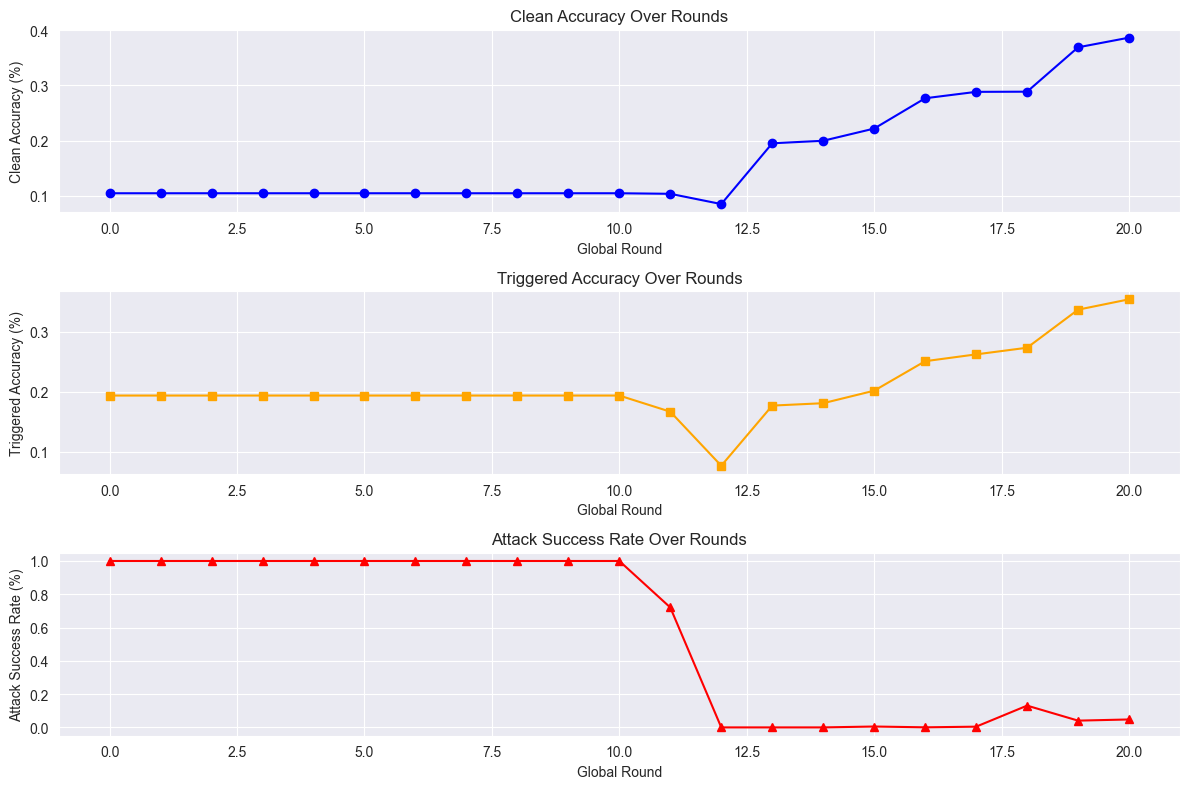

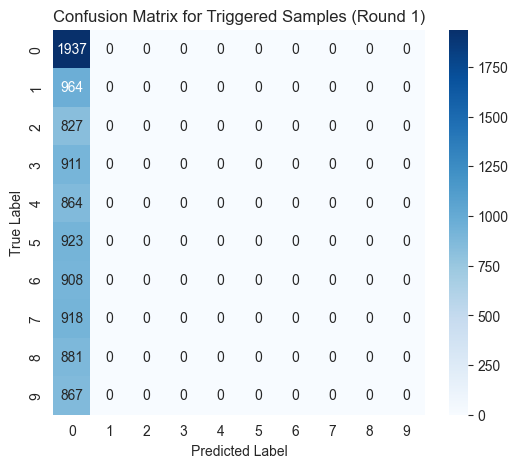

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

# Assume round_records is your list of dictionaries, one per round.
# Each record is assumed to have a structure similar to:
# {
#    "round_number": <int>,
#    "extra_info": {
#         "poison_metrics": {
#              "clean_accuracy": float,
#              "triggered_accuracy": float,
#              "attack_success_rate": float,
#              "confusion_matrix_triggered": np.array or similar
#         },
#         ... other info ...
#    },
#    ... other keys ...
# }

def extract_metrics(round_records):
    rounds = []
    clean_acc = []
    triggered_acc = []
    asr = []
    confusion_matrices = []

    for record in round_records:
        round_num = record.get("round_number", None)
        if round_num is None:
            continue
        rounds.append(round_num)
        poison_metrics = record.get("extra_info", {}).get("poison_metrics", {})
        clean_acc.append(poison_metrics.get("clean_accuracy", np.nan))
        triggered_acc.append(poison_metrics.get("triggered_accuracy", np.nan))
        asr.append(poison_metrics.get("attack_success_rate", np.nan))
        confusion_matrices.append(poison_metrics.get("confusion_matrix_triggered", None))
    return rounds, clean_acc, triggered_acc, asr, confusion_matrices

def plot_attack_metrics(rounds, clean_acc, triggered_acc, asr):
    plt.figure(figsize=(12, 8))
    
    # Plot Clean Accuracy
    plt.subplot(3,1,1)
    plt.plot(rounds, clean_acc, marker='o', linestyle='-', color='blue')
    plt.xlabel("Global Round")
    plt.ylabel("Clean Accuracy (%)")
    plt.title("Clean Accuracy Over Rounds")
    plt.grid(True)
    
    # Plot Triggered Accuracy
    plt.subplot(3,1,2)
    plt.plot(rounds, triggered_acc, marker='s', linestyle='-', color='orange')
    plt.xlabel("Global Round")
    plt.ylabel("Triggered Accuracy (%)")
    plt.title("Triggered Accuracy Over Rounds")
    plt.grid(True)
    
    # Plot Attack Success Rate
    plt.subplot(3,1,3)
    plt.plot(rounds, asr, marker='^', linestyle='-', color='red')
    plt.xlabel("Global Round")
    plt.ylabel("Attack Success Rate (%)")
    plt.title("Attack Success Rate Over Rounds")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

def visualize_confusion_matrix(conf_matrix, round_number):
    """
    Visualize a confusion matrix (assumed to be a numpy array) for a given round.
    """
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Triggered Samples (Round {round_number})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

round_records = []  # e.g., load from a file or variable

# For demonstration, here's a dummy record list
dummy_conf_matrix = np.array([[50, 10], [5, 35]])
round_records = torch.load(file_name, weights_only=False )  


# Extract metrics
rounds, clean_acc, triggered_acc, asr, conf_matrices = extract_metrics(round_records)

# Plot the main metrics over rounds
plot_attack_metrics(rounds, clean_acc, triggered_acc, asr)

# Optionally, visualize confusion matrix for a selected round, e.g., round 2
# You can loop over or choose a round based on some criteria.
selected_round_index = 1  # corresponds to round 2 in our dummy data
if conf_matrices[selected_round_index] is not None:
    visualize_confusion_matrix(conf_matrices[selected_round_index], rounds[selected_round_index])
